In [25]:
import keras
import numpy as np
import pandas as pd
from PIL import Image
from model import get_model
import matplotlib.pyplot as plt
from scripts.pre_process import load_data_batch, preprocess

## Create the training and testing data

In [21]:
channel = 1
im_size = 100
path = 'data'
im_path = path + '/images/'

In [7]:
train_size = 40000
test_size = 10000

train_ids = np.arange(train_size)
test_ids = np.arange(train_size) + train_size

x_train, y1_train, y2_train = load_data_batch(train_ids, len(train_ids), channel, im_size, path)

x_test, y1_test, y2_test = load_data_batch(test_ids, len(test_ids), channel, im_size, path)

## Train model from scratch

In [ ]:
model = get_model()

adam = keras.optimizers.Adam(lr=.001)
model.compile(loss=['sparse_categorical_crossentropy', 'mse'], optimizer=adam, metrics=['accuracy', 'mae'])

model.fit(x_train, [y1_train, y2_train], epochs=1, batch_size=256, validation_data=(x_test, [y1_test, y2_test]))

## Or load pretrained model

In [13]:
model = keras.models.load_model('model/clock.model')

## Testing

In [22]:
def predict(ind):        
        
    im = Image.open(im_path + str(ind) + '.jpg')
    plt.imshow(im)
    print('Input image:')
    plt.show()
    im = im.convert('L')
    im = im.resize((im_size,im_size), Image.ANTIALIAS)
    im = np.array(im)
    im = preprocess(im).reshape((1, im_size, im_size, channel))

    time = model.predict(im)
    
    hour = np.argmax(time[0])
    minute = int(time[1][0][0]*60)
    print('Detected Time:', str(hour)+':'+str(minute))

Input image:


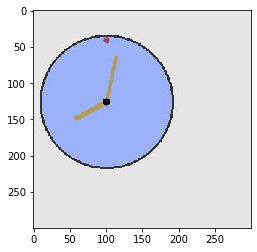

Detected Time: 8:9


In [65]:
predict(test_ids[33])